In [1]:
!pip install yfinance pandas requests beautifulsoup4 matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 939.5/939.5 kB 24.0 MB/s eta 0:00:0000:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.1/101.1 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 15.4 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.7-cp311-cp311-linux_x86_64.whl size=300128 sha256=6f40e12fce497a3852769cc79c4349358e5fa9222f48b7eb44baae5433ac2d94
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/fd/28/34/9ba1363b76703fe35ae8296af28ea74578a41b83544bb9da65
Successfully built peewee


In [2]:
import yfinance as yf

# Download Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()  # View the first few rows of the data


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from io import StringIO

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html.parser")

# Use StringIO to handle HTML content for pd.read_html
tables = pd.read_html(StringIO(str(soup)))
tesla_revenue = tables[0]

# Rename columns and clean up data
tesla_revenue.columns = ["Date", "Revenue"]
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].replace({r'\$': '', ',': ''}, regex=True).astype(float)

# Drop rows with missing values
tesla_revenue.dropna(inplace=True)

tesla_revenue.tail()

,Date,Revenue
8,1970-01-01 00:00:00.000002013,2013.0
9,1970-01-01 00:00:00.000002012,413.0
10,1970-01-01 00:00:00.000002011,204.0
11,1970-01-01 00:00:00.000002010,117.0
12,1970-01-01 00:00:00.000002009,112.0


In [4]:
# Download GameStop stock data
gamestop = yf.Ticker("GME")
gamestop_data = gamestop.history(period="max")
gamestop_data.reset_index(inplace=True)
gamestop_data.head()  # View the first few rows of the data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662209,1.603295,1.662209,6892800,0.0,0.0


In [5]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from io import StringIO

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html.parser")

# Use StringIO to handle HTML content for pd.read_html
tables = pd.read_html(StringIO(str(soup)))
gme_revenue = tables[0]

# Rename columns and clean up data
gme_revenue.columns = ["Date", "Revenue"]
gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'])
gme_revenue['Revenue'] = gme_revenue['Revenue'].replace({r'\$': '', ',': ''}, regex=True).astype(float)

# Drop rows with missing values
gme_revenue.dropna(inplace=True)

gme_revenue.tail()


,Date,Revenue
11,1970-01-01 00:00:00.000002009,8806.0
12,1970-01-01 00:00:00.000002008,7094.0
13,1970-01-01 00:00:00.000002007,5319.0
14,1970-01-01 00:00:00.000002006,3092.0
15,1970-01-01 00:00:00.000002005,1843.0


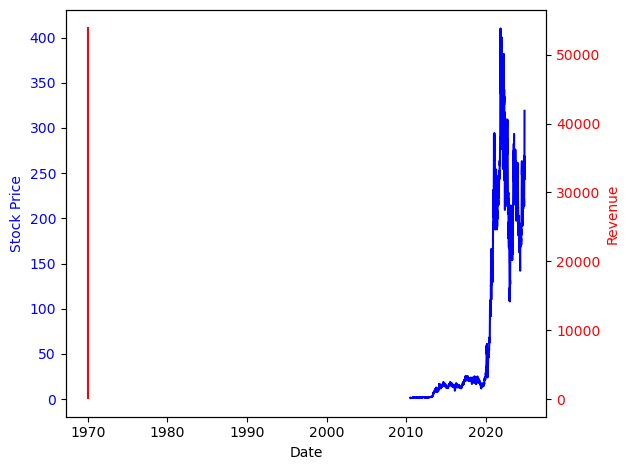

In [6]:
import matplotlib.pyplot as plt

# Plotting Tesla stock and revenue data
fig, ax1 = plt.subplots()

# Tesla stock price plot
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Price', color='blue')
ax1.plot(tesla_data['Date'], tesla_data['Close'], color='blue', label="Tesla Stock Price")
ax1.tick_params(axis='y', labelcolor='blue')

# Second axis for revenue
ax2 = ax1.twinx()
ax2.set_ylabel('Revenue', color='red')
ax2.plot(tesla_revenue['Date'], tesla_revenue['Revenue'], color='red', label="Tesla Revenue")
ax2.tick_params(axis='y', labelcolor='red')

fig.tight_layout()  # To prevent overlap
plt.show()


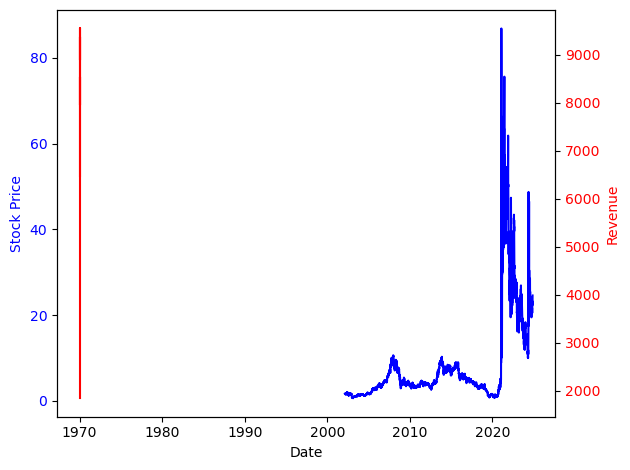

In [8]:
# Plotting GameStop stock and revenue data
fig, ax1 = plt.subplots()

# GameStop stock price plot
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Price', color='blue')
ax1.plot(gamestop_data['Date'], gamestop_data['Close'], color='blue', label="GameStop Stock Price")
ax1.tick_params(axis='y', labelcolor='blue')

# Second axis for revenue
ax2 = ax1.twinx()
ax2.set_ylabel('Revenue', color='red')
ax2.plot(gme_revenue['Date'], gme_revenue['Revenue'], color='red', label="GameStop Revenue")
ax2.tick_params(axis='y', labelcolor='red')

fig.tight_layout()
plt.show()
